<a href="https://colab.research.google.com/github/Shruti-Raj-Vansh-Singh/Object-detetcion-yolov3-/blob/master/Customized_object_detection_using_YOLOv3_Google_Open_Image_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customized Object Detection using YOLO v3


### Cloning Darknet \
We will first use the exisiting YOLO v3

In [ ]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5907, done.
remote: Total 5907 (delta 0), reused 0 (delta 0), pack-reused 5907
Receiving objects: 100% (5907/5907), 6.32 MiB | 4.96 MiB/s, done.
Resolving deltas: 100% (3922/3922), done.


In [ ]:
%cd darknet

/content/darknet


In [ ]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

Now we will download the weights of the model

In [ ]:
! wget https://pjreddie.com/media/files/yolov3.weights

--2020-07-04 17:03:29--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  4.35MB/s    in 1m 46s  

2020-07-04 17:05:15 (2.24 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



we will now make some helper functions

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

#method to display images
def imShow(path):
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image, (3*width, 3*height), interpolation= cv2.INTER_CUBIC)
  fig = plt.gcf()
  fig.set_size_inches(18,10)
  plt.axis('off')
  plt.imshow(resized_image)
  plt.show()

# funtion to upload file
def upload():
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print('saved file', name)

# function to download any file
def download(path):
    files.download(path)

Testing the detector on a dog image

In [ ]:
! ./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

Colab does not show the images by default using Opencv. so we need to explicitly call a function to open the image.

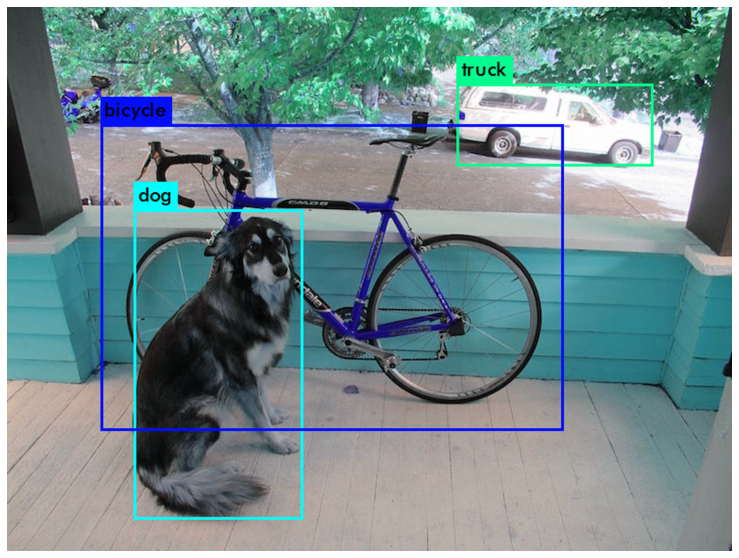

In [ ]:
imShow('predictions.jpg')

We can run the model on our own image too either by uploading it from local pc using upload() or from the drive using mount

In [ ]:
# going to the root directory to save the uploadedd image
%cd /content/darknet/
upload()

/content/darknet


Saving crowd.jpg to crowd.jpg
saved file crowd.jpg


In [ ]:
%cd /content/darknet
%ls

/content/darknet
backup/    examples/       LICENSE.fuck  LICENSE.v1       README.md
cfg/       include/        LICENSE.gen   Makefile         results/
crowd.jpg  libdarknet.a    LICENSE.gpl   obj/             scripts/
darknet*   libdarknet.so*  LICENSE.meta  predictions.jpg  src/
data/      LICENSE         LICENSE.mit   python/          yolov3.weights


Lets run the detector on the image uploaded

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights crowd.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

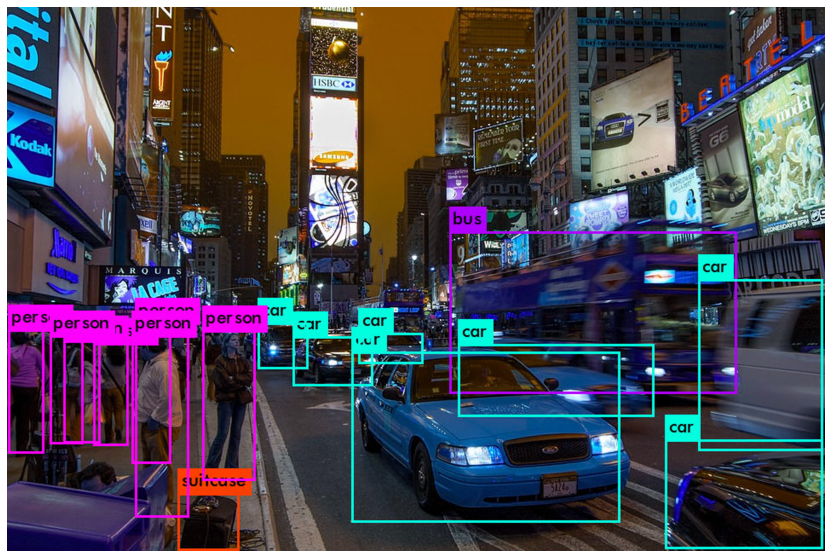

In [ ]:
imShow('predictions.jpg')

------


## Building our own dataset
There are 2 ways in which we can build our own dataset
1. We can download the images from google's Open Image dataset.
2. We can make our own dataset but we will have to define our own labels for the training set

Using Open image data. \
We can download classes using OID toolkit

In [ ]:
!git clone https://github.com/Shruti-Raj-Vansh-Singh/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 444, done.
remote: Total 444 (delta 0), reused 0 (delta 0), pack-reused 444
Receiving objects: 100% (444/444), 34.09 MiB | 9.63 MiB/s, done.
Resolving deltas: 100% (158/158), done.


In [ ]:
%cd OIDv4_ToolKit

/content/darknet/OIDv4_ToolKit


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 3.2MB 2.6MB/s 
     |████████████████████████████████| 6.3MB 20.9MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
  Found existing installation: botocore 1.17.9
    Uninstalling botocore-1.17.9:
      Successfully uninstalled botocore-1.17.9
  Found existing installation: rsa 4.6
    Uninstalling rsa-4.6:
      Successfully uninstalled rsa-4.6


Use downloader along woth the name of classes to download those classes. if we set multiclass=1 it means that all the images will be downloaded in one folder only

In [ ]:
!python main.py downloader --classes Ambulance Truck --type_csv train --limit 200 --multiclasses 1


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Ambulance', 'Truck'] together.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 36751 KB/s, 0 seconds p

We need to change the name of classes in the classes.txt file inside the toolkit folder

Also we need to change the format in which labels are stored according to the YOLO model using thw convert_annotation file

In [ ]:
!python convert_annotations.py

Currently in subdirectory: train
Converting annotations for class:  Ambulance_Truck
100% 398/398 [00:08<00:00, 45.41it/s]


### configuring files for training

In [ ]:
%cd /content/darknet/cfg/

/content/darknet/cfg


Make a copy of thw configure file so that we can make changes according to our needs. we can download the original config file and make changes in it and then use that customized file.

change the filters size in all the yolo layers to (5+class size)X3 and

In [ ]:
#!cp yolov3.cfg yolov3_custom.cfg

In [ ]:
upload()

Saving yolov3_custom.cfg to yolov3_custom.cfg
saved file yolov3_custom.cfg


  Now we need to make obj.name, obj.data file wth name of all the classes and details about the dataset respectively. We need a text editor for this \
  obj.names contains the names of the classses in the dataset \
  obj.data contains the no of classes, path for train set,validation set, the names of the classes and a backup


In [ ]:
%cd /content/darknet/data

/content/darknet/data


In [ ]:
upload()

Saving obj.data to obj.data
saved file obj.data


In [ ]:
upload()

Saving obj.names to obj.names
saved file obj.names


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [ ]:
%cd /content/darknet/


/content/darknet


In [ ]:
#to generate the train.txt file we will use the python code
up = files.upload()

Saving generate_train.py to generate_train.py


In [43]:
%cd /content/darknet/

/content/darknet


In [44]:
#!python generate_train.py
!ls "$PWD/OIDv4_ToolKit/OID/Dataset/train/Ambulance_Truck/"*.jpg  > train.txt

In [46]:
#copying the generated file to data folder
!cp train.txt /content/darknet/data/train.txt

WE will download the weights for the CNN model anf not for the compelete model

In [45]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-07-04 17:42:11--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  1.93MB/s    in 84s     

2020-07-04 17:43:36 (1.85 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



## Training our custom detector
since our model will take sometime to train we use a script so that Colab doesnot stop \
function ClickConnect(){ \
console.log("Working");   \
document.querySelector("colab-toolbar-button#connect").click()  \
} \
setInterval(ClickConnect,60000)

Now we will start training our model with -dont show as otherwise it will try to pop the result chart whuch is not possible in colab and the training will stop

In [47]:
%cd /content/darknet/

/content/darknet


In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

yolov3_custom
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8         

In [ ]:
imShow('chart.png')